In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [3]:
from keras.datasets import mnist

27 Feb
57 min

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
# API
model= Sequential()

# CNN
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
# DNN
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

Data Augmentation

In [8]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, array_to_img, load_img

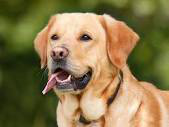

In [11]:
# Load image for data augmentation
image_file= '/content/dog.jpg'
dog_image= tf.keras.preprocessing.image.load_img(image_file)
dog_array= tf.keras.preprocessing.image.img_to_array(dog_image)
dog= dog_array.reshape((1,)+dog_array.shape)

# Inspect the image
dog_image

In [12]:
def plot_images(original_image, updated_image):
    plt.figure(figsize=(15,8))
    # Original image
    plt.subplot(1,2,1)
    plt.title('Original Image')
    plt.imshow(original_image)

    # Transformed image
    plt.subplot(1,2,2)
    plt.title('Transformed Image')
    plt.imshow(updated_image)

    plt.show()

Flip an image

In [19]:
transformed_fn= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=90)

In [20]:
transformed_array= transformed_fn.random_transform(dog_array)
transformed_image= tf.keras.preprocessing.image.array_to_img(transformed_array)

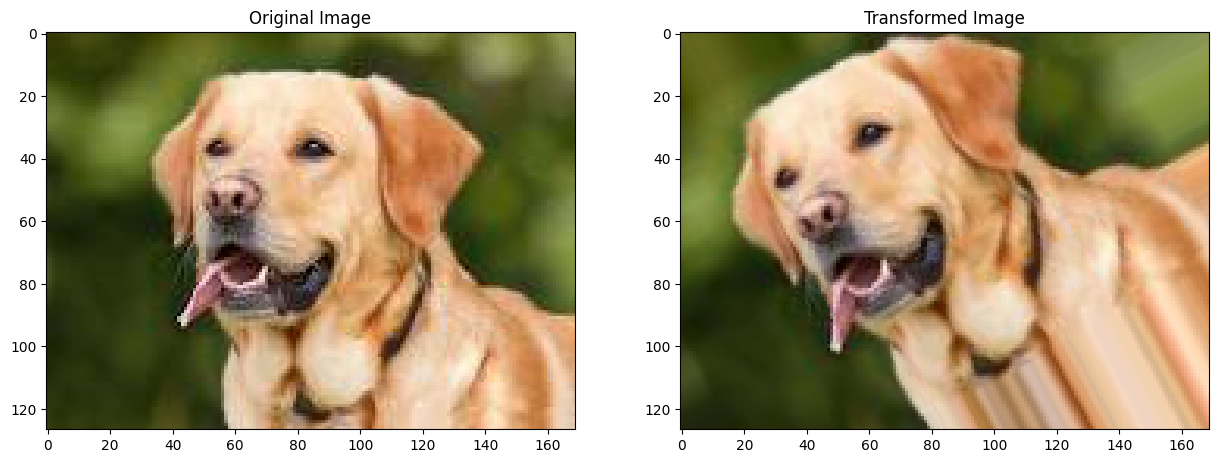

In [21]:
plot_images(dog_image, transformed_image)

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator